# Explore here

In [34]:
# Your code here
import pandas as pd
import numpy as np


df=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")


df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


hay que hacer un eda completo


In [35]:
#vamos a quitar las columnas menos relevantes para el problema

df.drop("region",axis=1,inplace=True)
df.head()




,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [36]:
#luego vamos a ver si hay duplicados
df.duplicated().sum()

np.int64(1)

In [37]:
#como solo hay un duplicado, lo borramos
df.drop_duplicates()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


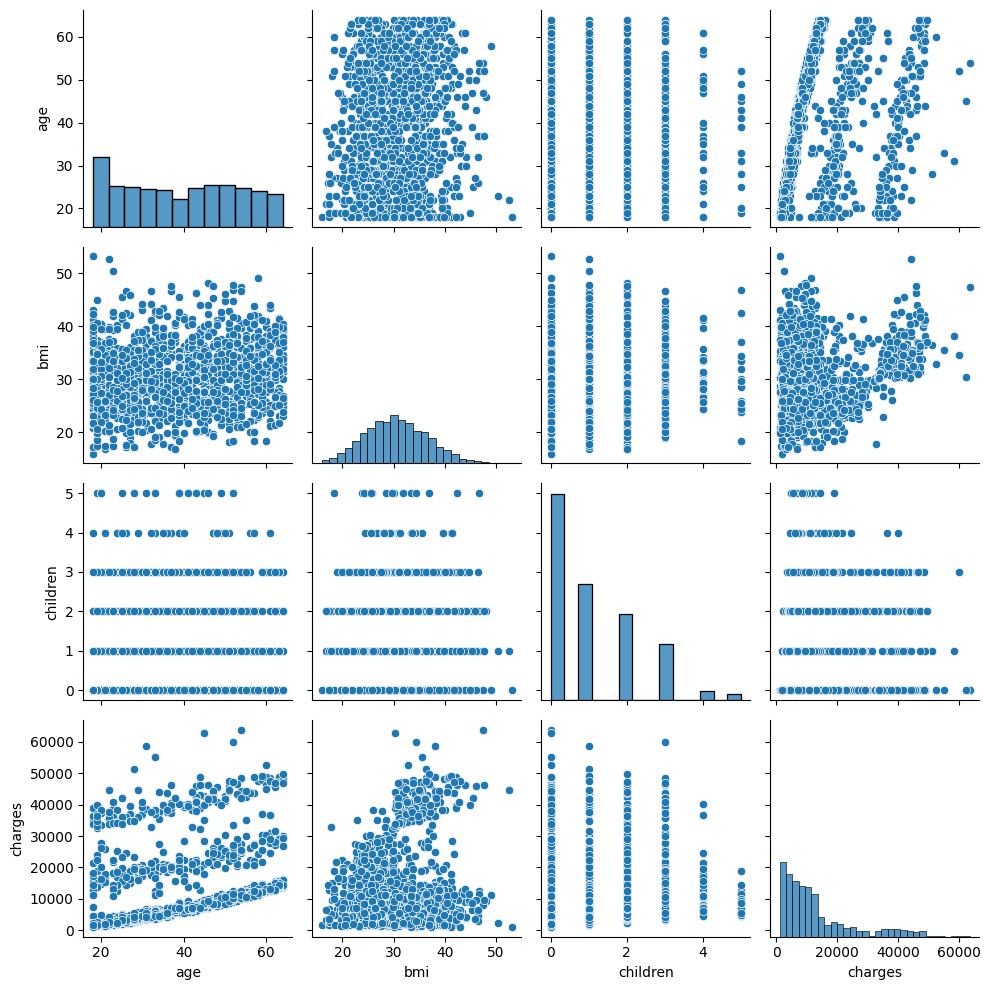

In [38]:
#ahora vamos a ver que tipo de relaciones hay entre las variables 
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df)
plt.tight_layout()
plt.show()

In [39]:
#dependiendo de la edad de la persona, podemos notar una linealidad en la grafica, hay distintos sectores dentro de la grafica, que podrian deberse a otra caracteristica que los diferencia.


In [40]:
#ahora veremos los tipos de variables que tenemos en el df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 62.8+ KB


In [41]:
#como tenemos variables categoricas, debemos factorizarlas
df["sex"]=pd.factorize(df["sex"])[0]#factorizamos df["sex"]
df["smoker"]=pd.factorize(df["smoker"])[0]#factorizamos df["smoker"]

df.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,0,16884.92400
1,18,1,33.770,1,1,1725.55230
2,28,1,33.000,3,1,4449.46200
3,33,1,22.705,0,1,21984.47061
4,32,1,28.880,0,1,3866.85520


<Axes: >

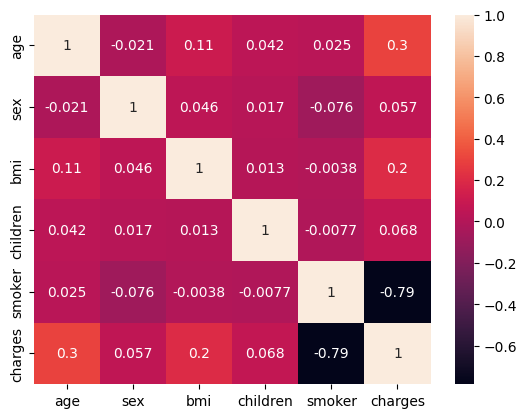

In [42]:
#ahora podemos hacer un mapa de calor
sns.heatmap(df.corr(),annot=True)

se nota una relacion considerable con los fumadores, la otra caracteristica que podria tener relacion es la edad, pero es mucho menor 


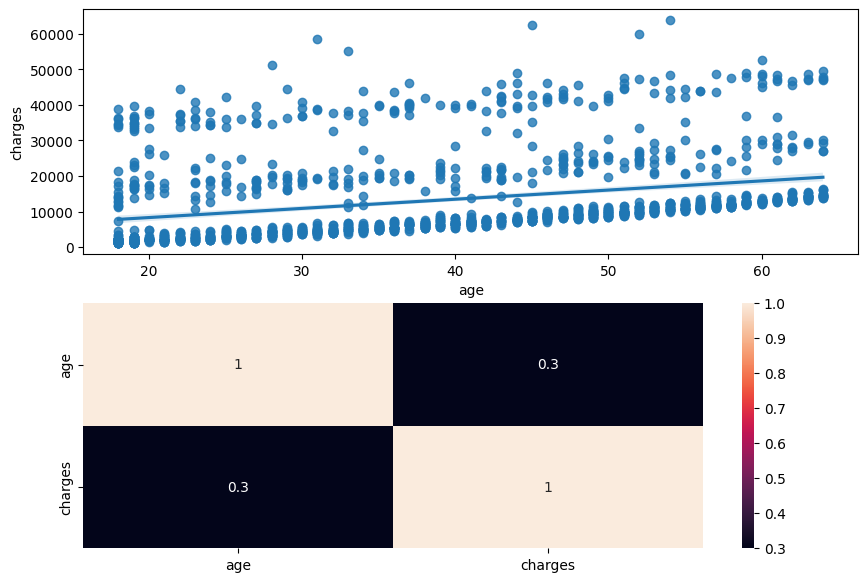

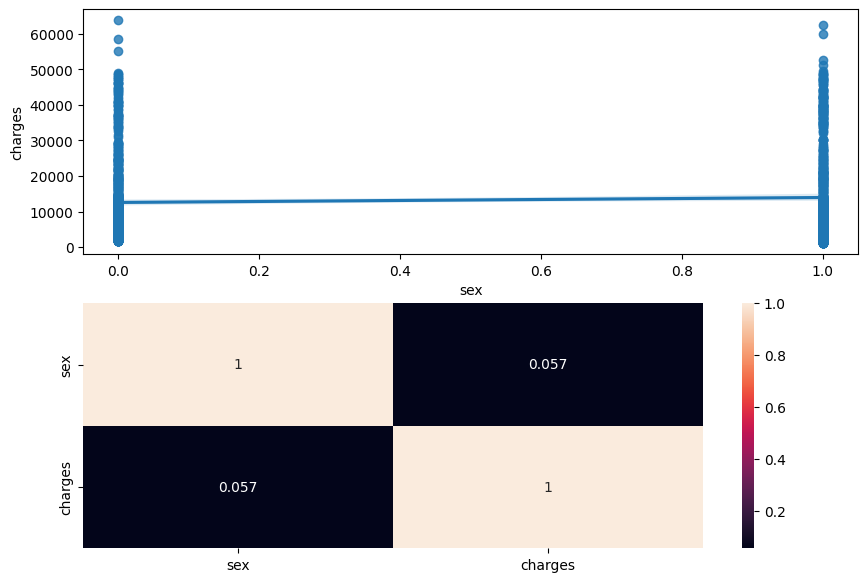

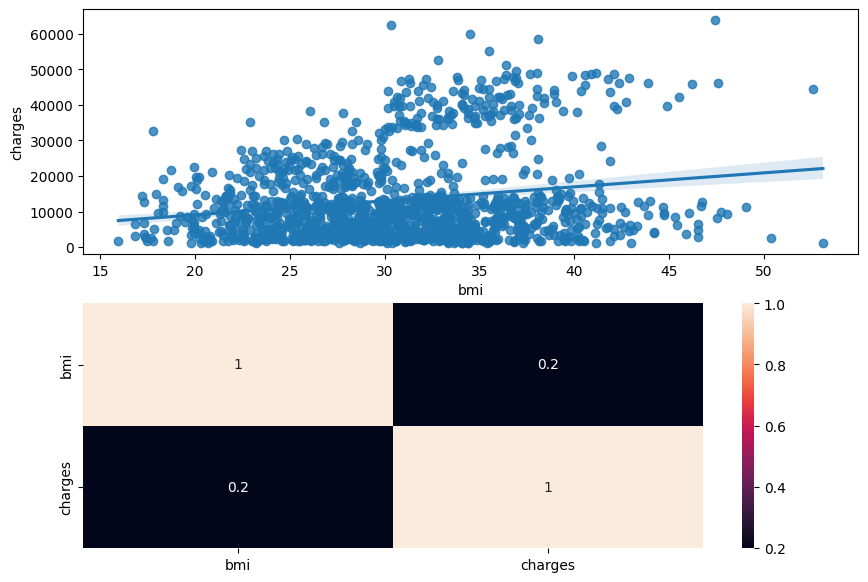

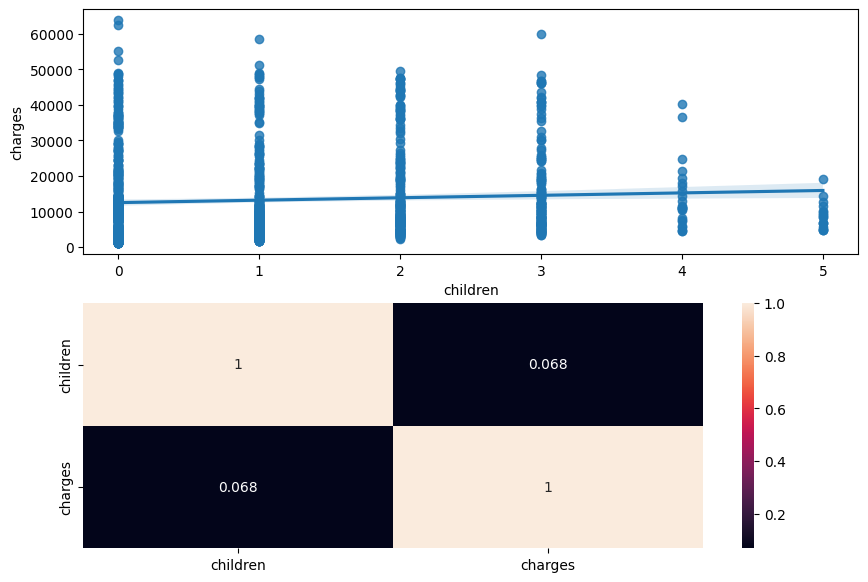

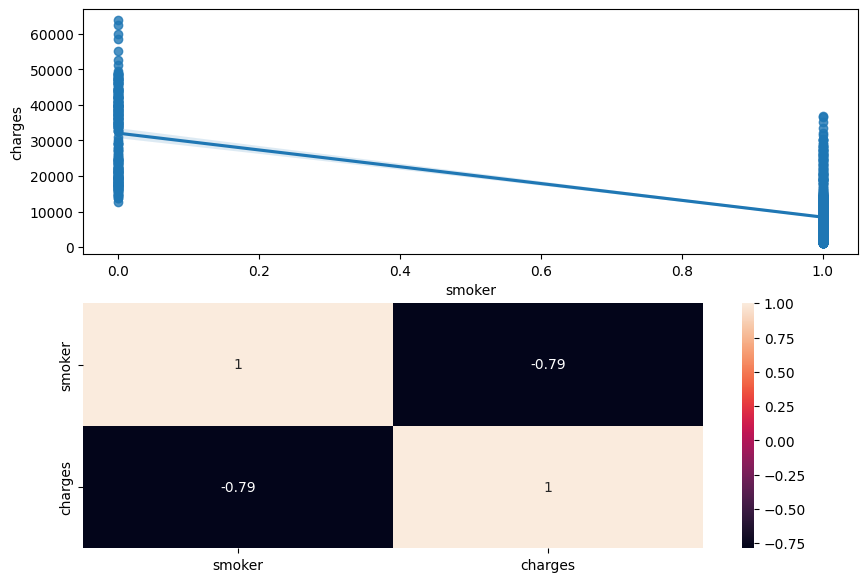

In [43]:

for columna in df.columns:
    if columna not in ("charges"):
        fig,axis=plt.subplots(2,1,figsize=(10,7))
        sns.regplot(df,x=columna,y=df["charges"],ax=axis[0])
        sns.heatmap(df[[columna,"charges"]].corr(),annot=True,ax=axis[1])
        


In [44]:
#ahora, que vimos todos los graficos, podemos quedarnos con las variables mas importantes.
X=df[["smoker","bmi","age"]]
y=df[["charges"]]
#diferenciamos las variables de entrenamiento de las de test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
X_train


,smoker,bmi,age
560,1,19.950,46
1285,1,24.320,47
1142,1,24.860,52
969,1,34.320,39
486,1,21.470,54
...,...,...,...
1095,1,31.350,18
1130,1,23.870,39
1294,1,25.175,58
860,0,47.600,37


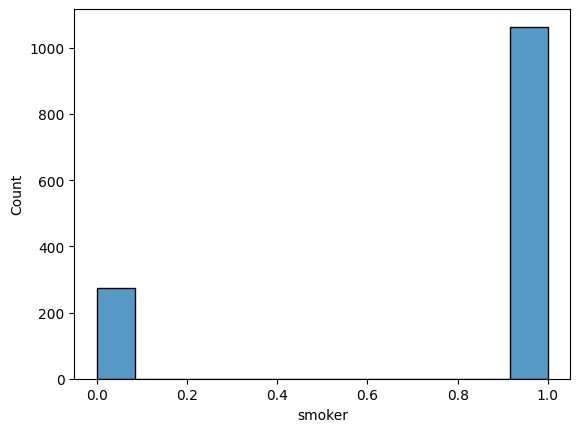

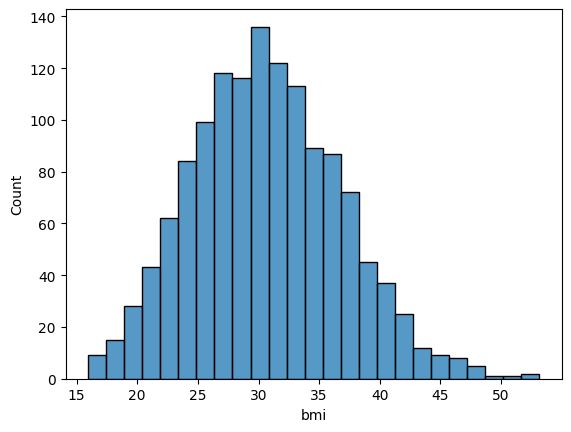

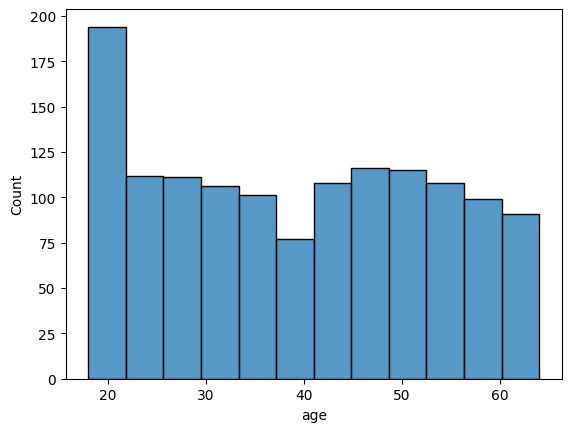

In [45]:
#para saber que tipo de normalizacion necesito, voy a ver como se distribuyen los datos.
for columnas in X.columns:
    sns.histplot(X,x=X[columnas])
    plt.show()

como solo hay una variable que tiene un comportamiento normal, vamos a utilizar MinMax_scaler


In [46]:
from sklearn.preprocessing import MinMaxScaler
procesar=MinMaxScaler()
X_train_esc=procesar.fit_transform(X_train)
X_test_esc=procesar.transform(X_test)
#ahora hay que transformarlos en dataframe
X_train_esc=pd.DataFrame(X_train_esc,columns=X_train.columns,index=X_train.index)
X_test_esc=pd.DataFrame(X_test_esc,columns=X_test.columns,index=X_test.index)


In [47]:
from sklearn.linear_model import LinearRegression
modelo=LinearRegression()
modelo.fit(X_train_esc,y_train)
print(f'inttercepcion del modelo: {modelo.intercept_}')
print(f'coeficientes b1,b2,b3: {modelo.coef_}')


inttercepcion del modelo: [21847.09890045]
coeficientes b1,b2,b3: [[-23675.37184666  12134.15512912  11932.86941266]]


In [48]:
#predicciones del modelo
y_pred=modelo.predict(X_test_esc)
y_pred

array([[ 8.18404147e+03],
       [ 7.43100100e+03],
       [ 3.73464371e+04],
       [ 8.62952830e+03],
       [ 2.73166548e+04],
       [ 1.11168596e+04],
       [ 5.71018530e+02],
       [ 1.72685468e+04],
       [ 1.20000791e+03],
       [ 1.03691549e+04],
       [ 2.77152613e+04],
       [ 8.91412866e+03],
       [ 5.47475597e+03],
       [ 3.77256063e+04],
       [ 4.08905253e+04],
       [ 3.68718212e+04],
       [ 1.49361936e+04],
       [ 3.61177211e+04],
       [ 9.38199609e+03],
       [ 3.18988228e+04],
       [ 2.57961333e+03],
       [ 1.00891140e+04],
       [ 3.14507861e+03],
       [ 6.99357366e+03],
       [ 1.04424884e+04],
       [ 1.29687423e+04],
       [ 1.53152131e+04],
       [ 5.22036025e+03],
       [ 9.16805346e+03],
       [ 2.80079135e+03],
       [ 8.23359765e+03],
       [ 1.34678580e+04],
       [ 5.12313156e+03],
       [ 2.58718594e+03],
       [ 4.83036995e+03],
       [ 1.29600084e+04],
       [ 2.35809809e+03],
       [ 9.20769841e+03],
       [ 3.3

In [49]:
from sklearn.metrics import root_mean_squared_error,r2_score
print(f'error cuadratico medio es: {root_mean_squared_error(y_test,y_pred)}')
print(f'R2: {r2_score(y_test,y_pred)}')

error cuadratico medio es: 5874.763304187488
R2: 0.7776932310583375


In [50]:
from pickle import dump
dump(modelo,open("../models/lineal_regresion_42","wb"))